I would like to ask the question of "Is there a connection between the depth of an earthquake and it's magnitude?"

In [12]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#stats libraries
import statsmodels.api as sm
import scipy

#allows us to show plots in notebook
%matplotlib inline
 

In [31]:
filename = 'Computation/Assignments/Data/SHEEF2010.txt' #created a variable that it would be easy to call

sheef = pd.read_csv(filename, sep = '\s+', header=1, index_col='Date')
#made dataframe into variable sheef, deleted unnecessary header, changed the index
sheef.max

<bound method DataFrame.max of                MW  Longitude  Latitude Source  Depth   DF    OM   OMT   MW2
Date                                                                       
162701010000  3.4    -70.800    42.600    NCE   0.00  3.8  MbLg  3.37   NaN
163806111900  6.5    -71.800    44.400    Ebe   0.00  6.5  MbLg  6.46   NaN
163807010000  2.4    -70.900    42.500    NCE   0.00  2.7  MbLg  2.36   NaN
163901250000  2.4    -70.950    42.500    NCE   0.00  2.7  MbLg  2.36   NaN
164303151200  2.9    -70.800    42.800    NCE   0.00  3.3  MbLg  2.90   NaN
164306111800  2.9    -70.800    42.800    NCE   0.00  3.3  MbLg  2.90   NaN
165311080000  2.4    -70.900    42.600    NCE   0.00  2.7  MbLg  2.36   NaN
165804140000  3.1    -70.900    42.500    NCE   0.00  3.5  MbLg  3.08   NaN
166102101200  5.3    -73.000    45.500    GSC   0.00  5.7    ML  5.29   NaN
166302051730  7.0    -70.100    47.600    GSC   0.00  7.0    Mw  7.00   NaN
166302052300  4.0    -70.100    47.600    GSC   0.00  4.4

In [6]:
#seperated the two variables I wanted to statistically check. Created a new dataframe called mag_depth.

mag_depth = sheef[['MW', 'Depth']]
mag_depth.head()

MW  Depth
Date                    
162701010000  3.4      0
163806111900  6.5      0
163807010000  2.4      0
163901250000  2.4      0
164303151200  2.9      0

(0, 10)

/Users/Jessi/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


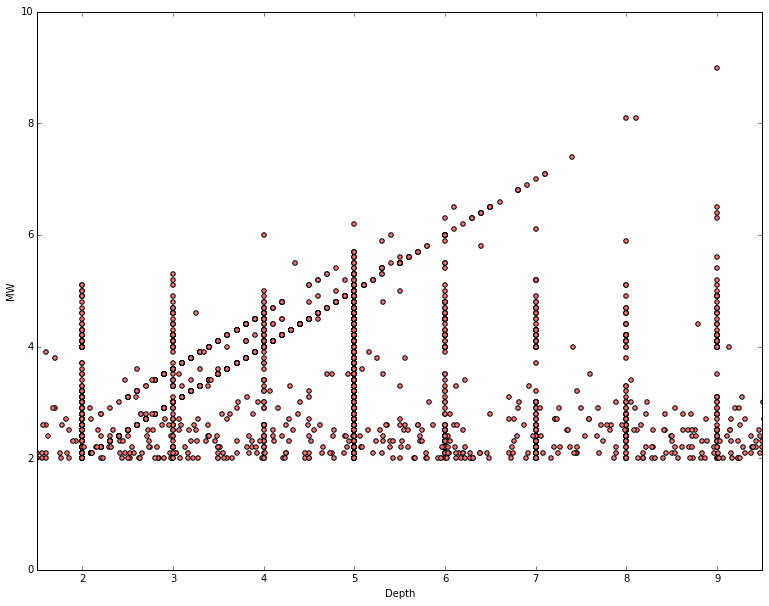

In [24]:
#Plotted the data from the two variables to see what they look like.

mag_depth.plot(kind ='scatter', x='Depth', y='MW', color='#FF7272', figsize=(13,10))
plt.xlim(1.5, 9.5)
plt.ylim(0, 10)

In [13]:
#statistics thing!
lm = sm.formula.ols(formula='MW ~ Depth', data = mag_depth).fit()

In [15]:
#more statistics things
lm.params

Intercept    2.938521
Depth        0.012186
dtype: float64

In [44]:
#created a new dataframe to do statistical things with.
d_new = pd.DataFrame({'Depth' : range(0, 100)})

In [45]:
d_new.head()

Depth
0      0
1      1
2      2
3      3
4      4

In [46]:
#This is going to help with the linear regression line I think
y_preds = lm.predict(d_new)
y_preds[0:100]

array([ 2.93852062,  2.95070624,  2.96289186,  2.97507747,  2.98726309,
        2.9994487 ,  3.01163432,  3.02381993,  3.03600555,  3.04819116,
        3.06037678,  3.0725624 ,  3.08474801,  3.09693363,  3.10911924,
        3.12130486,  3.13349047,  3.14567609,  3.15786171,  3.17004732,
        3.18223294,  3.19441855,  3.20660417,  3.21878978,  3.2309754 ,
        3.24316101,  3.25534663,  3.26753225,  3.27971786,  3.29190348,
        3.30408909,  3.31627471,  3.32846032,  3.34064594,  3.35283156,
        3.36501717,  3.37720279,  3.3893884 ,  3.40157402,  3.41375963,
        3.42594525,  3.43813086,  3.45031648,  3.4625021 ,  3.47468771,
        3.48687333,  3.49905894,  3.51124456,  3.52343017,  3.53561579,
        3.54780141,  3.55998702,  3.57217264,  3.58435825,  3.59654387,
        3.60872948,  3.6209151 ,  3.63310071,  3.64528633,  3.65747195,
        3.66965756,  3.68184318,  3.69402879,  3.70621441,  3.71840002,
        3.73058564,  3.74277126,  3.75495687,  3.76714249,  3.77

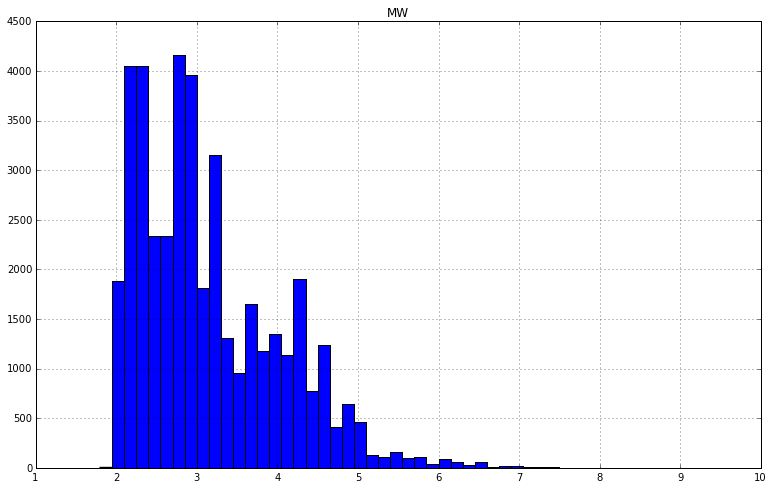

In [38]:
#checked the histogram to see if the data looks weird. It kinda does.
mag_depth.hist(column='MW', bins = 50, figsize=(13, 8))
plt.show()

/Users/Jessi/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


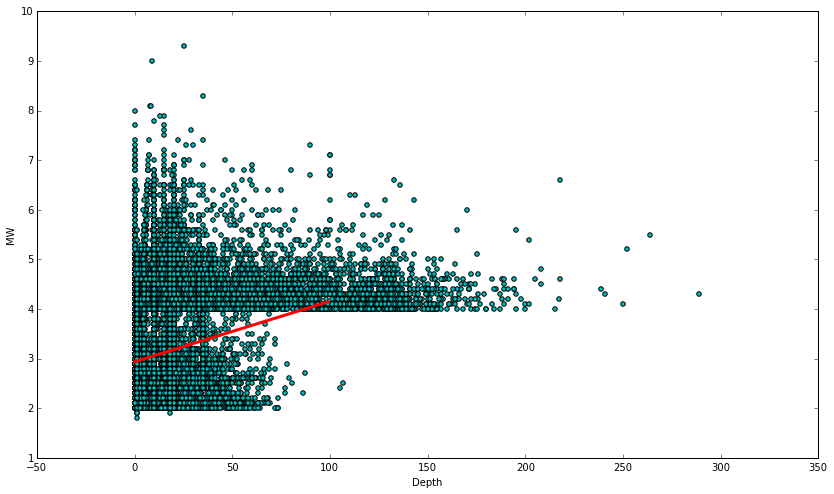

In [50]:
#added the statistical information to the scatter plot. The line doesn't match anything at all...
mag_depth.plot(kind='scatter', x='Depth', y='MW', color='c', figsize = (14, 8))
#plt.xlim(0, 70)
#plt.ylim(0, 0.3)

plt.plot(d_new, y_preds, color='red', linewidth=3)

In [48]:
#printed a summary of the statistical analysis to see what the numbers are saying.
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4003.
Date:                Thu, 05 Nov 2015   Prob (F-statistic):               0.00
Time:                        11:05:52   Log-Likelihood:                -51974.
No. Observations:               41690   AIC:                         1.040e+05
Df Residuals:                   41688   BIC:                         1.040e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9385      0.005    554.968      0.0

Given the absolute lack of any kind of signs that there is a conenction between depth and magnitude, this data leads me to believe there is no connection. The R-squared value is very close to 0%. Also, the probability is 0. Therefore, we learned there isnt a connection in this data set between the depth of an earthquake and its magnitude.